In [2]:
:dep dq3 = { path = "../" }
use dq3;

In [3]:
let before = dq3::player::PlayerInit {
        lv: 1,
        pow: 9,
        spd: 2,
        vit: 19,
        int: 2,
        lck: 3,
        sex: dq3::sex::Sex::Man,
        personality: dq3::personality::Personality::Tough,
        job: dq3::job::Job::Soldier,
        ..Default::default()
    }
    .init();
before

Player { lv: 1, max_hp: 1, max_mp: 0, attrs: {Pow: 9, Spd: 2, Vit: 19, Int: 2, Lck: 3}, sex: Man, personality: Tough, job: Soldier }

In [4]:
fn growthed_player(before: &dq3::player::Player, dst_level: u8) -> dq3::player::Player {
    let mut after = before.clone();

    for _ in before.level()..dst_level {
        after.levelup();
    }

    after
}

fn simulate_growth(before: &dq3::player::Player, dst_level: u8, sample: usize) -> Vec<dq3::player::Player> {
    let mut sequence = Vec::new();

    for _ in 0..sample {
        sequence.push(growthed_player(before, dst_level));
    }

    sequence
}

In [23]:
let dst_level = 22;
let sample = 100000;
let sequence = simulate_growth(&before, dst_level, sample);

In [24]:
:dep plotly = "0.7.0"
use plotly;

fn plot_status_dist(sequence: &Vec<dq3::player::Player>) -> plotly::Plot {
    let attr = dq3::attr::Attr::Vit;
    let seq: Vec<_> = sequence
        .iter()
        .map(|player| player.attrs[attr].to_num::<u8>())
        .collect();
    
    let trace = plotly::Histogram::new(seq.clone())
        .hist_norm(plotly::histogram::HistNorm::Probability)
        .marker(plotly::common::Marker::new().color(plotly::NamedColor::SeaGreen));
    
    let mut plot = plotly::Plot::new();
    let layout = plotly::Layout::new();
    
    plot.set_layout(layout);
    plot.add_trace(trace);
    
    plot
}

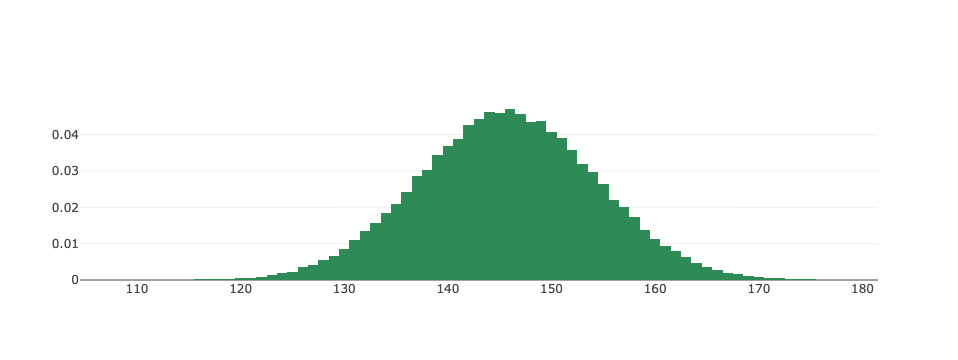

In [25]:
plot_status_dist(&sequence).lab_display();